# **Probability & Statistcs Cheatsheet**

In [1]:
import math
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

In [26]:
attention_df = pd.read_csv('../datasets/attention.csv')

## **Counting - Combinatorics**

### N factorial - N!

$$N! = 1 \cdot 2 \cdot 3 \cdot \ldots \cdot (N - 2) \cdot (N - 1) \cdot N$$

**When to use:** Finding the number of different ways one can order a given object.

In [3]:
number_of_books = 5

possible_book_arrangements = math.factorial(number_of_books)
print(possible_book_arrangements)

120


### N<sup>n</sup>

**When to use:** finding the number of results for a process that is ordered, with repetition

**Use cases:** rolling an *N-sided* die *n* times

In [4]:
sides_of_die = 6
number_of_rolls = 3

possible_results = math.pow(sides_of_die, number_of_rolls)
print(possible_results)

216.0


### k-permutations

$$P(n, k) = \frac{n!}{(n - k)!}$$

**When to use:** when you want to count the number of ways to arrange or select a specific number of items (k items) from a larger set without repetition and where the order of selection matters

**Use cases:**  calculating the number of ways a set of athletes can finish in a race, considering their positions

In [5]:
number_of_athlets = 10
number_of_positions = 3


def k_permutation_count(n, k):
    if n < k:
        return 0
    return math.factorial(n) / math.factorial(n - k)


possible_top3_of_race = k_permutation_count(number_of_athlets, number_of_positions)
print(possible_top3_of_race)

720.0


### Binominal coefficient

$$C(n, k) = \binom{n}{k} = \frac{n!}{k!(n-k)!}$$

**When to use:** binomial coefficient, often denoted as "n choose k" or "C(n, k)," represents the number of ways to choose k items from a set of n items without regard to the order and without repetition

**Use cases:** counting the number of ways to form a committee of 3 members from a group of 10 people

In [6]:
total_people = 10
open_member_positions = 3

possible_arrangements = math.comb(total_people, open_member_positions)
print(possible_arrangements)

120


### Unordered with repetition

$$\text C(n + k - 1, k) = \frac{(n + k - 1)!}{k! \cdot (n - 1)!}$$

**When to use:** scenarios where you need to count cases where items can be chosen more than once, and the order of selection doesn't matter

**Use cases:** you have a certain quantity of resources (e.g., candies, money, or identical items) and you want to distribute them among a group of people

In [7]:
number_of_1_dollar_bills = 10
people_to_gift = 4


def unordered_with_repetition(k, n):
    return math.comb((n + (k - 1)), n - 1)


total_ways_to_gift = unordered_with_repetition(number_of_1_dollar_bills, people_to_gift)
print(total_ways_to_gift)

286


---

## **Probability**

### Equally likely events

$$p = \frac{\text{number of desired outcomes}}{\text{total number of possible outcomes}}$$

**When to use:** when outcomes are equally likely

**Use cases:** lottery tickets, drawing balls from a sack (with replacement), rolling a die

In [8]:
total_number_of_ticket = 1000000
number_of_winning_tickets = 1


def probability_equally_likely(desired_outcomes, total_outcomes):
    return desired_outcomes / total_outcomes


probability_to_win = probability_equally_likely(number_of_winning_tickets, total_number_of_ticket)
print(probability_to_win)

1e-06


---

### Testing for Independence

If any of the following relations is true, then the event is said to be independent:

$$P(A) =  \frac{\text{P(A and B)}}{P(B)}$$
$$P(B) =  \frac{\text{P(A and B)}}{P(A)}$$

$$P\text{(A and B)} = P(A) \cdot P(B)$$

In [9]:
def is_probability_event_independent(probability_event_A, probability_event_B):
    probability_A_and_B = probability_event_A * probability_event_B
    if probability_event_A == probability_A_and_B / probability_event_B and probability_A_and_B / probability_event_A == probability_event_B:
        return True
    else:
        False


probability_event_A = 0.12
probability_event_B = 0.35

is_probability_event_independent(probability_event_A, probability_event_B)

True

---

<img src="../images/intersection.png" alt="My Resized Image" height="200">

### Intersection Probability (P and B) - Dependent Events

$$P\text{(A and B)} = P(A) \cdot P(B|A)$$

**When to use:** when the probability is conditional, when the occurence of one events does affect the probability that the other occurs. Dependent events can exclusive or nonexclusive

**Use cases:** drawing balls from a non-replacing sack, weather forecasting, game theory

In [10]:
total_number_of_balls = 10
number_of_red_balls = 4
number_of_blue_balls = 6

probability_of_red_ball = probability_equally_likely(number_of_red_balls, total_number_of_balls)
probability_of_blue_ball = probability_equally_likely(number_of_blue_balls, total_number_of_balls)
print(f"Probability of drawing a red ball: {probability_of_red_ball}")
print(f"Probability of drawing a blue ball: {probability_of_blue_ball}")

# we have drawn a red ball, therefore the total number of balls & the number of red balls change
new_total_of_balls = 10 - 1
new_number_of_red_balls = 4 - 1
print("We draw a red ball, no replacement.")

new_probability_of_red_ball = probability_equally_likely(new_number_of_red_balls, new_total_of_balls)
new_probability_of_blue_ball = probability_equally_likely(number_of_blue_balls, new_total_of_balls)
print(f"Probability of drawing a red ball decreases: {new_probability_of_red_ball}")
print(f"Probability of drawing a blue ball increases: {new_probability_of_blue_ball}")

Probability of drawing a red ball: 0.4
Probability of drawing a blue ball: 0.6
We draw a red ball, no replacement.
Probability of drawing a red ball decreases: 0.3333333333333333
Probability of drawing a blue ball increases: 0.6666666666666666


### Intersection Probability (P and B) - Independent Events

$$P\text{(A and B)} = P(A) \cdot P(B)$$

**When to use:** when the events do not affect each other, the occurence of one events does not affect the probability that the other occurs. Independent events must be nonexclusive

**Use cases:** ball drawing and dice rolls, manufacturing quality control

In [11]:
number_of_balls = 8
number_of_green_balls = 2

probability_of_drawing_green_ball = probability_equally_likely(number_of_green_balls, number_of_balls)
print(f"Probability of drawing a green ball: {probability_of_drawing_green_ball}")

number_of_die_sides = 6
ways_of_getting_a_3 = 1

probability_of_getting_a_3 = probability_equally_likely(ways_of_getting_a_3, number_of_die_sides)
print(f"Probability of rolling a three: {probability_of_getting_a_3}")


def probability_a_and_b_independent (prob_a, prob_b):
    return prob_a * prob_b


probability_of_green_ball_and_getting_3 = probability_a_and_b_independent(probability_of_drawing_green_ball, probability_of_getting_a_3)
print(f"Probability of drawing a green ball and rolling a three: {probability_of_green_ball_and_getting_3}")


Probability of drawing a green ball: 0.25
Probability of rolling a three: 0.16666666666666666
Probability of drawing a green ball and rolling a three: 0.041666666666666664


#### Further Resources 

- [Probability - Independent and Dependent Events (Youtube Video)](https://www.youtube.com/watch?v=lWAdPyvm400)

---

### Conditional Probability

$$ P(A|B) = \frac{\text{P(A and B)}}{P(B)}$$

**When to use:** 

**Use cases:** 

In [12]:
def calculate_conditional_probability(probability_a_and_b, probability_b):
    return probability_a_and_b / probability_b


prob_a_and_b = 0.3
prob_b = 0.7

calculate_conditional_probability(prob_a_and_b, prob_b)

0.4285714285714286

#### Further Resources 

- [Intro to Conditional Probability (Youtube Video)](https://www.youtube.com/watch?v=ibINrxJLvlM&list=PLyV7Y5k9aXDzvd9HknbQwH1BYhkavzWyf&index=5)

---

### Union Probability (P or B) - Mutually exclusive Events

<img src="../images/union-exclusive.png" alt="My Resized Image" height="200">

$$P\text{(A or B)} = P(A) + P(B)$$

**When to use:** when one events prevent the other from happening, they can not happen simultaneously. Exclusive events must be dependent

**Use cases:** dice rolls, sports game outcomes, election results

In [13]:
total_sides_of_die = 6
number_of_ways_to_roll_two = 1
number_of_ways_to_roll_five = 1

probability_of_rolling_two = probability_equally_likely(number_of_ways_to_roll_two, total_sides_of_die)
print(f"Probability of two: {probability_of_rolling_two}")

probability_of_rolling_five = probability_equally_likely(number_of_ways_to_roll_five, total_sides_of_die)
print(f"Probability of five: {probability_of_rolling_five}")


def probability_a_or_b_exclusive(prob_a, prob_b):
    return prob_a + prob_b


probability_of_two_or_five = probability_a_or_b_exclusive(probability_of_rolling_two, probability_of_rolling_five)
print(f"Probability of two or five: {probability_of_two_or_five}")

Probability of two: 0.16666666666666666
Probability of five: 0.16666666666666666
Probability of two or five: 0.3333333333333333


### Union Probability (P or B) - Non-mutually exclusive Events

<img src="../images/union-nonexclusive.png" alt="My Resized Image" height="200">

$$P\text{(A or B)} = P(A) + P(B) - P\text{(A and B)}$$

**When to use:** when one events does not prevent the other from happening, they can happen simultaneously. Nonexclusive events can be either independent or dependent

**Use cases:** drawing cards, multiple choice questions, event planning and event attendance

In [14]:
total_number_of_cards = 52
number_of_kings_in_deck = 4
number_of_hearts_in_deck = 13

probability_of_king = probability_equally_likely(number_of_kings_in_deck, total_number_of_cards)
print(f"Probability of drawing a king: {probability_of_king}")

probability_of_hearts = probability_equally_likely(number_of_hearts_in_deck, total_number_of_cards)
print(f"Probability of drawing a hearts card: {probability_of_hearts}")

probability_of_king_and_hearts = probability_a_and_b_independent(probability_of_king, probability_of_hearts)
print(f"Probability of drawing a king of hearts: {probability_of_king_and_hearts}")


def probability_a_or_b_nonexclusive(prob_a, prob_b):
    joint_probability = probability_a_and_b_independent(prob_a, prob_b)
    return prob_a + prob_b - joint_probability


probability_of_king_or_hearts = probability_a_or_b_nonexclusive(probability_of_king, probability_of_hearts)
print(f"Probability of drawing a king or a hearts card: {probability_of_king_or_hearts}")

Probability of drawing a king: 0.07692307692307693
Probability of drawing a hearts card: 0.25
Probability of drawing a king of hearts: 0.019230769230769232
Probability of drawing a king or a hearts card: 0.3076923076923077


#### Further Resources 

- [Probability of Mutually Exclusive Events With Venn Diagrams (Youtube Video)](https://www.youtube.com/watch?v=X6usGgwXFyU&t=0s)

---

### Bayes' Theorem

#### Simple Form 

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

$$or $$

$$P(A|B) = P(A) \cdot \frac{P(B|A)}{P(B)}$$

**Use Cases:** ou can use the simple form when you have all the necessary probabilities readily available and don't need to break down the calculation further. It's suitable for well-defined problems with complete data.

<img src="../images/bayes_simple.png" alt="My Resized Image" height="200">

In [15]:
def bayes_theorem_simple(prior_probability_event_a, prior_probability_evidence_b, probability_b_given_a):
    return (probability_b_given_a * prior_probability_event_a) / prior_probability_evidence_b


prior_probability_disease = 0.02
positive_test_given_disease = 0.95
positive_test_given_no_disease = 0.10
no_disease = 1 - prior_probability_disease
positive_test = (positive_test_given_disease * prior_probability_disease) + (positive_test_given_no_disease * no_disease)

disease_given_positive_test = bayes_theorem_simple(prior_probability_disease, positive_test, positive_test_given_disease)
print("Probability of having the disease given a positive test:", disease_given_positive_test)


Probability of having the disease given a positive test: 0.16239316239316237


#### Explicit Form

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B|A) \cdot P(A) + P(B|\neg A) \cdot P(\neg A)}$$

**Use Cases:** You can use the explicit form when you want to see the individual components that contribute to the calculation. It's helpful for transparency, understanding the factors at play, and adjusting probabilities based on additional information. 

When you have incomplete data, missing probabilities, or additional complexities, the explicit or general forms allow you to handle such situations by explicitly considering the components or by adapting the theorem to your specific needs.

<img src="../images/bayes_explicit.png" alt="My Resized Image" height="200">

In [16]:
def bayes_theorem_explicit(prob_a, prob_b_given_a, prob_b_given_not_a):
    numerator = prob_b_given_a * prob_a
    denominator = (prob_b_given_a * prob_a) + (prob_b_given_not_a * (1 - prob_a))
    
    posterior_prob = numerator / denominator

    return posterior_prob


prior_probability_disease = 0.02
positive_test_given_disease = 0.95
positive_test_given_no_disease = 0.10
no_disease = 1 - prior_probability_disease

disease_given_positive_test = bayes_theorem_explicit(prior_probability_disease, positive_test_given_disease, positive_test_given_no_disease)
print("Probability of having the disease given a positive test:", disease_given_positive_test)

Probability of having the disease given a positive test: 0.16239316239316237


#### General Form

$$P(A_i|B) = \frac{P(B|A_i) \cdot P(A_i)}{\sum_{i=1}^n P(B|A_i) \cdot P(A_i)}$$

**Use Cases:** The general form is useful in situations where you have multiple hypotheses (e.g., A₁, A₂, ...) and a common evidence (B). It allows you to calculate the posterior probability for each hypothesis based on the evidence.

The general form is essential when dealing with multiple hypotheses, as it allows you to calculate the posterior probabilities for each hypothesis given the same evidence.

<img src="../images/bayes_general.png" alt="My Resized Image" height="200">

In [17]:
def bayes_theorem_general_single(evidence_likelihood, prior_probability):
    # Calculate the posterior probability
    denominator = evidence_likelihood * prior_probability + (1 - evidence_likelihood) * (1 - prior_probability)
    posterior_probability = (evidence_likelihood * prior_probability) / denominator

    return posterior_probability


evidence_likelihood = 0.9  # Likelihood for the single hypothesis
prior_probability = 0.3    # Prior probability for the single hypothesis

posterior_probability = bayes_theorem_general_single(evidence_likelihood, prior_probability)
print("Posterior Probability:", posterior_probability)



Posterior Probability: 0.7941176470588237


In [18]:
def bayes_theorem_general_list(evidence_likelihoods, prior_probabilities):
    posterior_probabilities = []

    # Calculate the denominator, which is the sum of likelihood * prior for all hypotheses
    denominator = sum(likelihood * prior for likelihood, prior in zip(evidence_likelihoods, prior_probabilities))

    # Calculate the posterior probability for each hypothesis
    for likelihood, prior in zip(evidence_likelihoods, prior_probabilities):
        posterior = (likelihood * prior) / denominator
        posterior_probabilities.append(posterior)

    return posterior_probabilities

# Example usage:
evidence_likelihoods = [0.9, 0.2, 0.7]  # Likelihoods for each hypothesis
prior_probabilities = [0.3, 0.4, 0.3]  # Prior probabilities for each hypothesis

posterior_probabilities = bayes_theorem_general_list(evidence_likelihoods, prior_probabilities)
print("Posterior Probabilities:", posterior_probabilities)


Posterior Probabilities: [0.48214285714285715, 0.14285714285714288, 0.37499999999999994]


#### Further resources

- [Bayes' Theorem - The Simplest Case (Youtube Video)](https://www.youtube.com/watch?v=XQoLVl31ZfQ&list=PLyV7Y5k9aXDzvd9HknbQwH1BYhkavzWyf&index=7&t=27s)
- [Bayesian Statistics: An Introduction  (Youtube Video)](https://www.youtube.com/watch?v=Pahyv9i_X2k&list=PLyV7Y5k9aXDzvd9HknbQwH1BYhkavzWyf&index=9)

---

## **Random Variables**

A random variable is a mathematical abstraction used to quantify the uncertainty associated with the outcomes of a random experiment. It assigns a numerical value to each possible outcome, allowing us to analyze and work with the probability distribution of those outcomes. Random variables come in two main types: discrete and continuous. Discrete random variables can only take on a countable set of distinct values, such as the result of rolling a die or the number of emails received in a day. Continuous random variables, on the other hand, can assume any value within a specified range, such as the height of individuals in a population or the time it takes for a process to complete.

### Discrete random variables

Discrete random variables are variables in probability theory that can take on a countable number of distinct values, typically whole numbers.

Examples are:

1. Coin Flip: The outcome of a fair coin flip can be modeled as a discrete random variable. It can take on two values: "Heads" (H) or "Tails" (T).
2. Roll of a Die: When you roll a standard six-sided die, the number that comes up can be represented as a discrete random variable. It can take on values from 1 to 6.
3. Number of Emails Received: The number of emails you receive in a day is a discrete random variable. It can take on values like 0, 1, 2, 3, and so on.

### Continuous random variables
A continuous random variable is a type of random variable that can take on any value within a specified range or interval. Unlike discrete random variables, which can only assume distinct and separate values, continuous random variables have an infinite number of possible values within their range. These values are typically associated with measurements or quantities that can be expressed as real numbers.

Examples are:
1. Temperature: The temperature in a given location is a continuous random variable because it can take on any real value within a certain range. It might be 75.6 degrees Fahrenheit, 20.2 degrees Celsius, or any other continuous temperature measurement.
2. Weight of a Product: The weight of a product, say a bag of apples, can be considered a continuous random variable. It can vary continuously within a specified range, and measurements can be expressed as real numbers.
3. Distance Traveled by a Commuter: The distance a commuter travels to work can be modeled as a continuous random variable. Commuters can travel varying distances, and these distances can be expressed as real numbers.

### Mixed random variables
Mixed random variables, also known as mixed-type random variables, are a combination of both discrete and continuous random variables within the same probabilistic model. In other words, they can take on both discrete values, typically at specific points, and continuous values, typically within intervals, depending on the context or the nature of the random phenomenon being modeled.

Examples are:

1. Time Spent on a Website: Users' time spent on a website can be modeled as a mixed random variable. You might categorize time into discrete intervals like "less than 1 minute," "1-5 minutes," "5-10 minutes," and so on, but in reality, users spend a continuous amount of time within these intervals.
2. Number of Cars Passing an Intersection in 1 Minute: This can be treated as a mixed random variable. You can count the discrete number of cars that pass by but also consider the continuous time interval within which they pass.
3. Duration of Phone Calls: Phone call durations can be categorized into discrete intervals (e.g., "1-2 minutes," "2-5 minutes," "5-10 minutes"), but the duration within each interval is continuous.

---

## **Expectation Values**

### Sample vs. Population

#### Sample Inference:
- **Definition:** Sample inference, also known as *inferential statistics*, involves making conclusions or inferences about a population based on data collected from a representative subset of that population, which is called a sample.
- **Purpose:** Sample inference is used when it is not feasible or practical to collect data from an entire population. Instead, you gather data from a sample and use statistical techniques to draw conclusions about the entire population.
- **Example:** If you want to know the average income of all residents in a city, it's impractical to survey everyone. Instead, you might collect income data from a random sample of households and use that sample to estimate the average income for the entire city.

#### Population Inference:
- **Definition:** Population inference, sometimes called *descriptive statistics*, is concerned with summarizing and describing characteristics of an entire population/ dataset. It doesn't involve drawing conclusions or making predictions about a larger group based on a sample.
- **Purpose:** Population inference is typically used when you have data on the entire population (or simply a complete dataset) and want to understand its characteristics, such as calculating the true population mean, variance, or creating histograms.
- **Example:** If a company has data on the salaries of all its employees, they can directly calculate the average salary of the entire workforce without needing to use inferential statistics.

We will mostly focus on descriptive statistics i.e. population inference in the following sections.

---

### Central moments

#### 1. Central moment: **Expectation value (Weighted Mean)**

**Insights it provides:** The expected value (also known as the mean or average) provides a measure of the central tendency of a random variable. It represents the "average" helping to locate the "center" of the probability distribution. The expected value represents the long-term average or mean outcome in a repeated random experiment. It provides a sense of what one can expect on average over many trials.

**Use cases:** Fair pricing i.e. finding the average price, evaluate different product development strategies by comparing their potential outcomes, Meteorologists use expected values to forecast daily weather conditions, such as the expected amount of rainfall, etc.

##### *1. a) For discrete random values:*
$$E(X) = \mu = \sum_{x} x \cdot P(X=x)$$
$$E(X) = \mu = x1 \cdot P(x1) + x2 \cdot P(x2) + x3 \cdot P(x3) + ... + xm \cdot P(xm)$$

- **E(X)** or **μ**  represents the expectation value (mean) of the discrete random variable X.
- **x** represents each possible value of the random variable X.
- **P(X=x)** represents the probability that X takes on the value x.

$$\text{Example}$$

P(X=1)=0.3

P(X=2)=0.5

P(X=3)=0.2

$$E(X) = (1 \cdot 0.3) + (2 \cdot 0.5) + (3 \cdot 0.2)$$
$$E(X) = 0.3 + 1.0 + 0.6$$
$$E(X) = 1.9$$

In [19]:
# in form of a function
def expected_value_discrete(values, probabilities):
    expected_value = sum(value * prob for value, prob in zip(values, probabilities))
    
    return expected_value


values = [1, 2, 3]
probabilities = [0.3, 0.5, 0.2]

expected_value_disc_function = expected_value_discrete(values, probabilities)

# with SciPy stats
custom_disc_distribution = stats.rv_discrete(values=(values, probabilities))
expected_value_disc_scipy = custom_disc_distribution.mean()

print("Expected Value (Discrete - function):", expected_value_disc_function)
print("Expected Value (Discrete - SciPy):", expected_value_disc_scipy)

Expected Value (Discrete - function): 1.9000000000000001
Expected Value (Discrete - SciPy): 1.9000000000000001


In [20]:
# attention dataset scores example
score_counts = attention_df['score'].value_counts()
score_probabilities = score_counts / len(attention_df)

unique_scores = score_probabilities.index
scores_probabilities = score_probabilities.values

attention_score_distribution = stats.rv_discrete(values=(unique_scores, scores_probabilities))
expectation_value_attention = attention_score_distribution.mean()

print(expectation_value_attention)

5.958333333333333


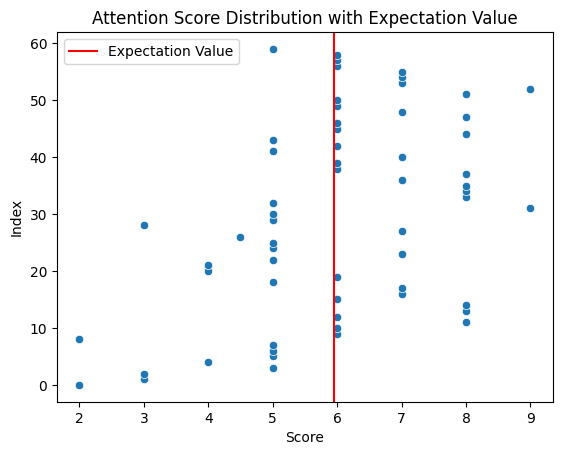

In [21]:
sns.scatterplot(data=attention_df, x="score", y=attention_df.index)

plt.axvline(x=expectation_value_attention, color='r', linestyle='-', label='Expectation Value')

plt.xlabel("Score")
plt.ylabel("Index")
plt.title("Attention Score Distribution with Expectation Value")

plt.legend(loc="upper left")

plt.show()

##### *1. b) For continuous random values:*
$$E(X) = \mu = \int_{-\infty}^{\infty} x \cdot f(x) \, dx$$

- **E(X)** or **μ**  represents the expectation value (mean) of the continuous random variable X.
- **x** represents the variable of integration.
- **f(x)** represents the probability density function (pdf) of the continuous random variable X.

$$\text{Example}$$

$$E(X) = \int_{0}^{1} x \cdot 1 \, dx$$
$$E(X) = \left[\frac{x^2}{2}\right]_{0}^{1}$$
$$E(X) = \frac{1}{2} - 0$$
$$E(X) = \frac{1}{2}$$

In [22]:
# in form of a function
def expected_value_continuous(pdf_function, lower_limit, upper_limit, num_samples=1000):
    step_size = (upper_limit - lower_limit) / num_samples
    expected_value = sum(pdf_function(x) * x * step_size for x in 
                        (lower_limit + i * step_size for i in range(num_samples)))
    
    return expected_value


def uniform_pdf(x):
    if 0 <= x <= 1:
        return 1
    else:
        return 0


lower_limit = 0
upper_limit = 1

expected_value_cont_function = expected_value_continuous(uniform_pdf, lower_limit, upper_limit)

# with SciPy stats
cont_rv_object = stats.uniform(loc=lower_limit, scale=upper_limit - lower_limit)
expected_value_cont_scipy = cont_rv_object.expect()

print("Expected Value (Continuous - function):", expected_value_cont_function)
print("Expected Value (Continuous - SciPy):", expected_value_cont_scipy)

Expected Value (Continuous - function): 0.49950000000000017
Expected Value (Continuous - SciPy): 0.5


---

#### **Conditional Expectation**

**Insights it provides:** represent the expected value (mean) of a random variable given certain information or conditions. They are a way to calculate the expected value of a random variable when you have additional information about the probability distribution or some event has occurred.

**Use cases:** filtering and state estimation to estimate the true state of a system given noisy observations, assessing risk by providing insights into expected outcomes under specific conditions, etc.

$$E(X \mid Y = y) = \int_{-\infty}^{\infty} x \cdot f_{X \mid Y}(x \mid y) \, dx$$

- **E(X|Y=y)** represents the conditional expectation of the random variable X given that the random variable Y takes on a specific value y.
- **x** represents a particular value that X can take on. It is a dummy variable used in the integration process.
- **f{X|Y}(x|y)** represents the conditional probability density function (PDF) of X given Y. It describes the probability distribution of X when we know the value of Y is y.
- **dx** represents an infinitesimal change in the value of x. In the context of the integral, it signifies that we are summing (integrating) over all possible values of x within the entire range of X.

$$\text{Example}$$

$$\text{Suppose we have two continuous random variables X and Y, and we want to find the conditional expectation of X given a specific value of Y, say \(Y = 2\).}$$
$$\text{We have the conditional probability density function f{X | Y}(x | y) to be defined as follows:}$$

$$f_{X \mid Y}(x \mid y) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(x - 2y)^2}{2}}$$

$$\text{Now, let's calculate the conditional expectation:}$$

$$E(X \mid Y = 2) = \int_{-\infty}^{\infty} x \cdot \frac{1}{\sqrt{2\pi}} e^{-\frac{(x - 4)^2}{2}} \, dx$$

$$\text{We can now evaluate this integral to find the conditional expectation of X given (Y = 2).}$$


---

#### 2. Central moment: **Population Variance**
**Insights it provides:** Variance quantifies the dispersion/ distribution of data around the mean. It gauges data consistency. 

- *Low variance:* suggests that data points are closer to the mean. Indicate less variability i.e. data points deviate less from the mean.
- *High variance:* indicates that data points are more spread out from the mean. Indicate greater variability i.e. data points deviate mroe from the mean.

**Use cases:** variance is used to assess the precision and consistency of production processes, assesses risk in finance, quality control, and insurance, and aids in experimental design, process improvement, data analysis, machine learning, and environmental monitoring.

##### *2. a) For discrete random variables:*

$$\text{Var}(X) = \sigma^2 = E[(X - \mu)]^2$$
$$\text{Var}(X) = (x1 - \mu)^2 \cdot P(x1) + (x2 - \mu)^2 \cdot P(x2) + ... + (xm - \mu)^2 \cdot P(xm)$$

- **Var(X)** represents the variance of the discrete random variable X.
- **x** represents each possible value of X.
- **μ** represents the mean (expected value) of X.
- **P(X=x)** represents the probability that X takes on the value x

$$\text{Example}$$

P(X=1)=0.3

P(X=2)=0.5

P(X=3)=0.2

$$\text{Var}(X) = (1 - 1.9)^2 \cdot 0.3 + (2 - 1.9)^2 \cdot 0.5 + (3 - 1.9)^2 \cdot 0.2$$
$$\text{Var}(X) = (-0.9)^2 \cdot 0.3 + (0.1)^2 \cdot 0.5 + (1.1)^2 \cdot 0.2$$
$$\text{Var}(X) = 0.81 \cdot 0.3 + 0.01 \cdot 0.5 + 1.21 \cdot 0.2$$
$$\text{Var}(X) = 0.243 + 0.005 + 0.242$$
$$\text{Var}(X) = 0.49$$

In [23]:
# in form of a function
def population_variance(data):
    mean = np.mean(data)
    squared_diff = [(x - mean) ** 2 for x in data]
    variance = np.mean(squared_diff)
    
    return variance


data = [1, 2, 3, 4, 5]

start_time = time.time()
population_variance = calculate_variance(data)
end_time = time.time()
variance_function_time = end_time - start_time

# using numpy variance
start_time = time.time()
variance_numpy = np.var(data)
end_time = time.time()
variance_numpy_time = end_time - start_time

print(f"Variance (function): {variance_function} in {variance_function_time} seconds")
print(f"Variance (numpy): {variance_numpy} in {variance_numpy_time} seconds")

NameError: name 'calculate_variance' is not defined

In [ ]:
# attention dataset scores example
variance_scores = np.var(attention_df["score"])
variance_scores

In [ ]:
sns.scatterplot(data=attention_df, x="score", y=attention_df.index)

plt.axvline(x=expectation_value_attention, color='r', linestyle='-', label='Expectation Value')
plt.fill_betweenx(attention_df.index, expectation_value_attention - variance_scores, expectation_value_attention + variance_scores, color='blue', alpha=0.1, label='Variance')

plt.xlabel("Score")
plt.ylabel("Index")
plt.title("Attention Score Distribution with Expectation Value and Variance")

plt.legend()

plt.show()

##### *2. b) For continuous random variables:*

$$\text{Var}(X) = \sigma^2 = \int_{-\infty}^{\infty} (x - \mu)^2 \cdot f(x) \, dx$$

- **Var(X)** represents the variance of the continuous random variable X.
- **x** represents the variable of integration.
- **μ** represents the mean (expected value) of X.
- **f(x)** represents the probability density function (PDF) of the continuous random variable X.


$$\text{Example}$$
$$\text{Var}(X) = \int_{0}^{1} (x - 0.5)^2 \cdot 1 \, dx$$
$$\text{Var}(X) = \int_{0}^{1} (x - 0.5)^2 \, dx$$
$$\text{Var}(X) = \left[\frac{1}{3}x^3 - \frac{1}{4}x^4 + \frac{1}{48}x^2\right]_{0}^{1}$$
$$\text{Var}(X) = \left(\frac{1}{3} - \frac{1}{4} + \frac{1}{48}\right) - (0 - 0 + 0)$$
$$\text{Var}(X) = \frac{1}{12}$$


---


#### **Covariance**

**Insights it provides:** provides insights into the relationship between two variables. It quantifies the degree to which these variables vary together. The sign of the covariance (positive or negative) and its magnitude offer specific insights:

- **Positive Covariance:** A positive covariance indicates that as one variable increases, the other tends to increase as well. In other words, there is a positive linear association or tendency for the two variables to move in the same direction.
- **Negative Covariance:** A negative covariance indicates that as one variable increases, the other tends to decrease. There is a negative linear association or tendency for the two variables to move in opposite directions.
- **Magnitude of Covariance:** The absolute value of the covariance provides information about the strength of the association between the variables. A larger absolute covariance indicates a stronger relationship, while a smaller value suggests a weaker relationship.

**Use cases:** Economists use covariance to analyze relationships between economic indicators, in particle physics, covariance matrices are used to describe the uncertainties and correlations in measurements of particle properties, in machine learning, covariance can be used as a feature selection criterion (features with high covariance may be redundant), etc.

$$\text{Cov}(X, Y) = E[XY] - E[X]E[Y]$$

- **Cov(X, Y)** Covariance between two variables X and Y, measuring how they vary together.
- **E[XY]** represents the expected value (or mean) of the product of X and Y.
- **E[X] and E[Y]** represent the expected values (or means) of X and Y, respectively.

$$\text{Example}$$

$$\text{Suppose we have two random variables } X \text{ and } Y, \text{ each with probability distributions:}$$

$$X = \{x_1, x_2, x_3, \ldots\} \text{ and } Y = \{y_1, y_2, y_3, \ldots\}$$

$$\text{where } x_i \text{ and } y_i \text{ represent possible values of } X \text{ and } Y. \text{ We also have their respective probability mass functions (PMFs) } p_X(x_i) \text{ and } p_Y(y_i).$$

$$\text{First, calculate the expected value mean of  X and Y:}$$

$$E[X] = \sum_{i} x_i \cdot p_X(x_i)$$
$$E[Y] = \sum_{i} y_i \cdot p_Y(y_i)$$

$$\text{Next, calculate the expected value of the product XY:}$$

$$E[XY] = \sum_{i} \sum_{j} x_i \cdot y_j \cdot p_{XY}(x_i, y_j)$$

$$\text{Finally, use the formula to calculate the covariance between X and Y:}$$

$$\text{Cov}(X, Y) = E[XY] - E[X]E[Y]$$

---

#### **Sample variance**
**Insights it provides:**  Sample variance is used when you have data from a subset or sample of a larger population and want to estimate the variability or spread within that sample. It provides an estimate of how data points within a sample deviate from the sample mean (average). In other words, it tells you how "spread out" the data is within your sample. A larger sample variance suggests greater variability in the sample data.

**Use cases:** common in survey research where you cannot survey an entire population, medical and biological research sample variance is used when studying a subgroup of individuals or experimental subjects, etc.

$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

- **s2** is the sample variance.
- **n** is the number of data points in the sample.
- **xi** represents each individual data point in the sample.
- **xˉ** (pronounced as "x-bar") is the sample mean (average), calculated as 1n∑i=1nxin1​∑i=1n​xi​.
- **∑** represents the summation symbol, indicating that you should sum up the squared differences for all data points.

$$\text{Example}$$

$$\text{Sample Variance} = s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

$$\text{Suppose we have a dataset of } n \text{ observations:}$$

$$X = \{x_1, x_2, x_3, \ldots, x_n\}$$

$$\text{where } x_i \text{ represents individual data points, and } \bar{x} \text{ is the sample mean, calculated as:}$$

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

$$\text{Next, we calculate the squared differences between each data point and the sample mean:}$$

$$(x_i - \bar{x})^2 \quad \text{for } i = 1, 2, 3, \ldots, n$$

$$\text{Then, we sum up these squared differences:}$$

$$\sum_{i=1}^{n} (x_i - \bar{x})^2$$

$$\text{Finally, we divide this sum by } (n-1) \text{ to obtain the sample variance } s^2:$$

$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

$$\text{This formula calculates the sample variance, which is a measure of the spread or dispersion of data points around the sample mean.}$$


---

---

#### **Standard deviation**
**Insights it provides:** The standard deviation provides a measure of the degree of variability or spread in a dataset. A larger standard deviation indicates greater variability, while a smaller one suggests less variability. It helps describe the shape and distribution of the data. 

In a normal distribution, about 68% of data points fall within one standard deviation of the mean, approximately 95% within two standard deviations, and nearly 99.7% within three standard deviations. This provides a rough guideline for identifying potential outliers. Data points that fall more than three standard deviations away from the mean can be considered extreme outliers in a normal distribution.

**Use cases:** In clinical trials and medical research, standard deviation is used to evaluate the variability in patient responses to treatments, in education, standard deviation is used to assess the reliability of test scores, market researchers use standard deviation to analyze survey responses and consumer preference, etc.

$$\sigma = \sqrt{\text{Var}(X)}$$

- **σ** represents the standard deviation.
- **Var(X)** is the variance of the random variable X.

In [ ]:
# using function
def calculate_standard_deviation(variance):
    return math.sqrt(variance)


data = [1, 2, 3, 4, 5]

variance = calculate_variance(data)
start_time = time.time()
standard_deviation_function = calculate_standard_deviation(variance)
end_time = time.time()
fucntion_execution_time = end_time - start_time

# using numpy
start_time = time.time()
standard_deviation_numpy = np.std(data, ddof=1)
end_time = time.time()
numpy_execution_time = end_time - start_time

# using scipy
start_time = time.time()
standard_deviation_scipy = stats.tstd(data)
end_time = time.time()
scipy_execution_time = end_time - start_time

print(f"Standard deviation (function): {standard_deviation_function} in {fucntion_execution_time} seconds")
print(f"Standard deviation (numpy): {standard_deviation_numpy} in {numpy_execution_time} seconds")
print(f"Standard deviation (scipy): {standard_deviation_scipy} in {scipy_execution_time} seconds")

In [ ]:
# attention dataset scores example
standard_deviation_scores = stats.tstd(attention_df["score"])
standard_deviation_scores

In [ ]:
sns.scatterplot(data=attention_df, x="score", y=attention_df.index)

plt.axvline(x=expectation_value_attention, color='r', linestyle='-', label='Expectation Value')
plt.fill_betweenx(attention_df.index, expectation_value_attention - variance_scores, expectation_value_attention + variance_scores, color='blue', alpha=0.1, label='Variance')
plt.fill_betweenx(attention_df.index, expectation_value_attention - standard_deviation_scores, expectation_value_attention + standard_deviation_scores, color='blue', alpha=0.2, label='Standard Deviation')

plt.xlabel("Score")
plt.ylabel("Index")
plt.title("Attention Score Distribution with Expectation Value and Variance")

plt.legend()

plt.show()

---

#### **Standard deviation of the mean (Standard Error)**
**Insights it provides:** The Standard Error reflects how close the sample statistic (e.g., sample mean) is expected to be to the true population parameter (e.g., population mean). A smaller SE indicates higher precision, meaning the sample statistic is likely to be closer to the population parameter. It accounts for the inherent variability in sample statistics that arises from random sampling. Even with random sampling, different samples from the same population can yield slightly different estimates. The SE quantifies this variability.

The SE is used to calculate confidence intervals. A confidence interval provides a range within which the population parameter is likely to fall with a certain level of confidence. A narrower confidence interval (smaller SE) indicates greater confidence in the estimate's precision.

**Use cases:** In hypothesis testing, the SE is used to compute test statistics (e.g., t-statistic or z-statistic), in survey research, the SE is used to assess the reliability of survey estimates, etc.

$$\text{Standard deviation of the mean} = \frac{\sigma}{\sqrt{n}}$$

- **σ** standard deviation
- **n** number of samples

---

#### 3. Central moment: **Skewness**
**Insights it provides:** provides insights into the asymmetry or lack of symmetry in a probability distribution. It helps us understand how the data is distributed with respect to its central value (mean or median). Larger positive or negative values of skewness indicate more pronounced skewness, while values closer to zero suggest a distribution closer to symmetry.

- *Positive Skew (Right Skew):* indicates that the distribution has a tail that extends to the right. This means that there are outliers or extreme values on the right side of the distribution, and the majority of data points are concentrated on the left side.
- *Negative Skew (Left Skew):* indicates that the distribution has a tail that extends to the left. In this case, there are outliers or extreme values on the left side of the distribution, and the majority of data points are concentrated on the right side.

**Use cases:** Economists use skewness to analyze income distributions within populations, Skewness is used to analyze environmental data, such as rainfall distribution, in educational research, skewness can be used to analyze test score distributions or student performance data, etc.

$$\text{Population Skewness} = E[\left(\frac{X - \mu}{\sigma}\right)^3]$$

- **E** denotes the expected value, which is calculated by taking the average over the entire population.
- **X**  represents the random variable.
- **μ** irepresents the population mean (expected value).
- **σ** represents the population standard deviation.
- **(X−μ)3** represents the cubed differences between each data point and the mean.

$$\text{Example}$$

$$\text{Suppose we have a population with } N \text{ data points:}$$

$$X = \{x_1, x_2, x_3, \ldots, x_N\}$$

$$\text{where } x_i \text{ represents individual data points.}$$

$$\text{First, calculate the population mean (\(\mu\)):}$$

$$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$$

$$\text{Next, calculate the population standard deviation (\(\sigma\)):}$$

$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$$

$$\text{Now, calculate the standardized values for each data point:}$$

$$z_i = \frac{x_i - \mu}{\sigma} \quad \text{for } i = 1, 2, 3, \ldots, N$$

$$\text{Then, calculate the third moment of the standardized values:}$$

$$E[Z^3] = \frac{1}{N} \sum_{i=1}^{N} z_i^3$$

$$\text{Finally, use the formula to calculate the population skewness:}$$

$$\text{Population Skewness} = E\left[\left(\frac{X - \mu}{\sigma}\right)^3\right] = E[Z^3]$$

In [ ]:
data = [1, 2, 2, 4, 5]

skewness_numpy = np.mean((data - np.mean(data)) ** 3) / (np.std(data) ** 3)
skewness_scipy = stats.skew(data)

print("Population Skewness (NumPy):", skewness_numpy)
print("Population Skewness (SciPy):", skewness_scipy)

In [ ]:
# attention dataset scores example
skewness_scores = stats.skew(attention_df["score"])
skewness_scores

In [ ]:
sns.histplot(data=attention_df, x="score", bins=9, kde=True)

plt.xlabel("Score")
plt.ylabel("Frequency of result")
plt.title(f"Attention Score Distribution (Skewness={skewness_scores:.2f})")

description_text = "Left skew/ negative skew, more outliers on the left."
plt.text(1.6, -3, description_text, fontsize=12)

plt.show()

---

#### 4. Central moment: **Population Kurtosis**
**Insights it provides:** provides insights into the shape of the tails of that distribution. It tells you whether the distribution has fatter or thinner tails than a normal distribution. 

- *Thicker/ positive (leptokurtic) tails:* means that extreme values or outliers are more likely in the data, and the distribution has more data points in the tails. A distribution with positive kurtosis often has a more peaked or sharp central peak. It suggests that the data points are more concentrated around the mean, and there are more extreme values in the tails.
- *Thinner/ negative (platykurtic) tails:* means extreme values or outliers are less likely, and the distribution has fewer data points in the tails. A distribution with negative kurtosis often has a flatter central peak. It suggests that the data points are more evenly spread out and that there are fewer extreme values in the tails.

**Use cases:** used to assess the risk of extreme events or outliers, assess whether a given probability distribution model fits the data well, check assumptions about the distribution of data and the validity of statistical tests, etc.

$$\text{Population Kurtosis} = E[\left(\frac{X - \mu}{\sigma}\right)^4]$$

- **X** represents the random variable.
- **μ** represents the population mean (expected value).
- **σ** represents the population standard deviation.
- **E** denotes the expected value, which is calculated by taking the average over the entire population.
- **(X−μ)4** represents the fourth power of the differences between each data point and the mean.

$$\text{Example}$$

$$\text{Suppose we have a population with } N \text{ data points:}$$

$$X = \{x_1, x_2, x_3, \ldots, x_N\}$$

$$\text{where } x_i \text{ represents individual data points.}$$

$$\text{First, calculate the population mean (\(\mu\)):}$$

$$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$$

$$\text{Next, calculate the population standard deviation (\(\sigma\)):}$$

$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$$

$$\text{Now, calculate the standardized values for each data point:}$$

$$z_i = \frac{x_i - \mu}{\sigma} \quad \text{for } i = 1, 2, 3, \ldots, N$$

$$\text{Then, calculate the fourth moment of the standardized values:}$$

$$E[Z^4] = \frac{1}{N} \sum_{i=1}^{N} z_i^4$$

$$\text{Finally, use the formula to calculate the population kurtosis:}$$

$$\text{Population Kurtosis} = E\left[\left(\frac{X - \mu}{\sigma}\right)^4\right] = E[Z^4]$$


In [ ]:
data = [1, 2, 2, 4, 5]

kurtosis_numpy = np.mean((data - np.mean(data))**4) / (np.std(data)**4)
kurtosis_scipy = stats.kurtosis(data, fisher=False)

print("Population Kurtosis (NumPy):", kurtosis_numpy)
print("Population SkewKurtosisness (SciPy):", kurtosis_scipy)

In [ ]:
# attention dataset scores example
kurtosis_scores = stats.kurtosis(attention_df["score"], fisher=False)
kurtosis_scores

---

## **Probability Distributions**

- what are they used for
- why are they helpful
In probability and statistics, a probability distribution is a mathematical function that describes the likelihood of different outcomes (events) occurring in a random experiment or process. It provides a systematic way to assign probabilities to various possible values or events, which helps us understand and model uncertainty.

Key components of a probability distribution include:

- Sample Space: The set of all possible outcomes of a random experiment is called the sample space and is typically denoted as Ω.
- Random Variable: A random variable is a function that maps each outcome in the sample space to a real number. It represents the quantity of interest in a probabilistic experiment.
- Probability Function: The probability distribution defines how probabilities are assigned to different values of the random variable. This can be expressed in various ways, - depending on whether the variable is discrete or continuous.
    - For discrete random variables, the probability distribution is often described using a probability mass function (PMF), which assigns a probability to each possible value of the random variable.
    - For continuous random variables, the probability distribution is described using a probability density function (PDF), which characterizes the likelihood of the random variable falling within a particular range of values.
- Cumulative Distribution Function (CDF): The cumulative distribution function (CDF) is another important concept in probability distributions. It gives the probability that a random variable takes on a value less than or equal to a specific value.

---

### Discrete Distributions

#### **Probability Mass Function (PMF)**

The Probability MAss Function is used to describe the probability distribution of a discrete random variable. The PMF assigns a probability to each possible outcome of a discrete random variable.

$$P(X = x) = \text{probability of } X \text{ taking the value } x$$

<img src="../images/pmf.png" alt="My Resized Image" height="200">

#### **Cumulative Distribution Function (CDF)**

The Cumulative Distribution Function is used to describe the cumulative probability distribution of a random variable. In other words, it tells you the probability that a random variable will take on a value less than or equal to a specific value. The CDF provides a comprehensive view of the distribution of a random variable. It starts at 0 for the lowest possible value and approaches 1 as x approaches positive infinity. The CDF is a monotonically non-decreasing function, meaning it never decreases as you move along the values of x.

$$F(x) = P(X \leq x)$$

<img src="../images/cdf_disc.png" alt="My Resized Image" width="800">

#### **Uniform distribution**

#### **Bernoulli distribution**
- formula
- graph
- expectation value
- variance

#### **Binomial distribution**
- formula
- graph
- expectation value
- variance

#### **The Negative Binomial Distribution**

#### **The Geometric distribution**
- formula
- graph
- expectation value
- variance

#### **Poisson distribution**
- formula
- graph
- expectation value
- variance

---

### Continuous Distributions

#### **Cumulative Distribution Function (CDF)**
- formula
- graph

#### **Probability Density Function (PDF)**
- formula
- graph

#### **Uniform distribution**
- formula
- graph
- expectation value
- variance

#### **Gaussian/ Normal distribution**
- formula
- graph
- expectation value
- variance

#### **Student's T Distribution**
- formula
- graph
- expectation value
- variance

#### **Exponential distribution**
- formula
- graph
- expectation value
- variance

#### **The Beta Distribution**
- formula
- graph
- expectation value
- variance

#### **The Gamma Distribution**
- formula
- graph

#### **Weibull Distribution**
- formula
- graph

---

## **Joint distributions**

#### **The Multivariate Hyper-Geometric Distribution**

#### **The Multivariate Normal Distribution**

#### **The Uniform Distribution**

#### **Conditional distributions**

#### **Marginal distributions**

---

## **Inequalities/ Probability Bounds**

#### **Markov’s Inequality**

#### **Chebyshev’s Inequality**

#### **Hoeffding’s Inequality**

#### **Hoeffding’s inequality of Bernoulli random variables**

#### **Cauchy-Schwarz Inequality**

#### **Jensen’s Inequality**

---

## **The Law of Large Numbers**
- definition
- what it helps us achieve/ understand

---

## **Central Limit Theorems**

- definition
- gaussian approximation (?)